# Analyzing Party Composition in the Lok Sabha

In [119]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import numpy as np
import regex as re
import wikipedia as pywiki

In [110]:
data_root = './lok_sabha_member_data'

lok_sabha_member_data_files = ['{data_root}/{i}'.format(data_root = data_root, i = i) for i in os.listdir(data_root)]
lok_sabha_member_data_files.sort(key = lambda x: int(re.search(r'[0-9]+', x).group(0)))
lok_sabha_member_data_files[:5]

['./lok_sabha_member_data/lok_sabha_1.csv',
 './lok_sabha_member_data/lok_sabha_2.csv',
 './lok_sabha_member_data/lok_sabha_3.csv',
 './lok_sabha_member_data/lok_sabha_4.csv',
 './lok_sabha_member_data/lok_sabha_5.csv']

In [62]:
lok_sabha_ex = pd.read_csv(lok_sabha_member_data_files[0]).drop(columns = ['Unnamed: 0'])
lok_sabha_ex.head()

,Member,Party Name,Constituency
0,"Abdullabhai,Mulla Taherali Mulla",Congress,Chanda (Madhya Pradesh )
1,"Abdus Sattar,Shri",Congress,Kalna-Katwa (West Bengal )
2,"Achal Singh,Seth",Congress,Agra (Uttar Pradesh )
3,"Achalu,Shri Sunkam",PDF,Nalgonda-SC (Hyderabad )
4,"Achint Ram,Lala",Congress,Hissar (Punjab )


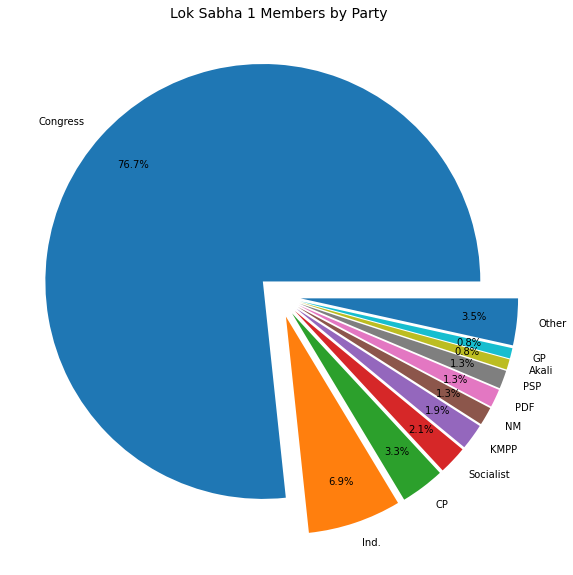

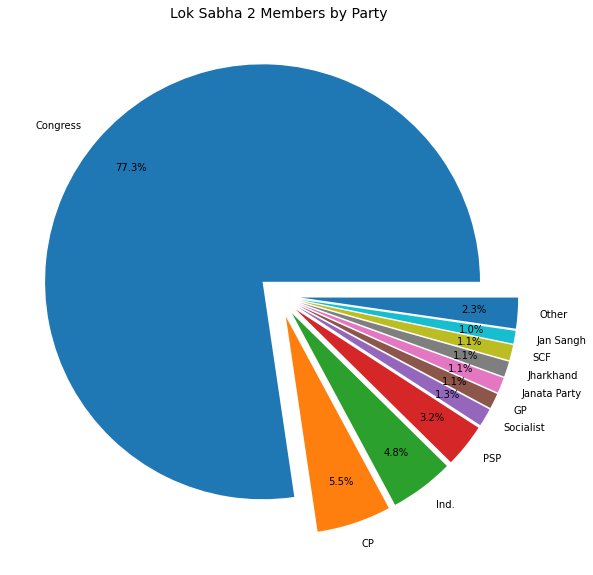

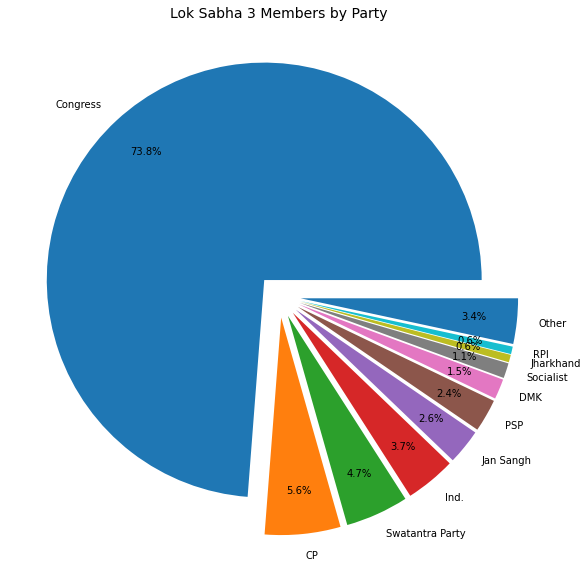

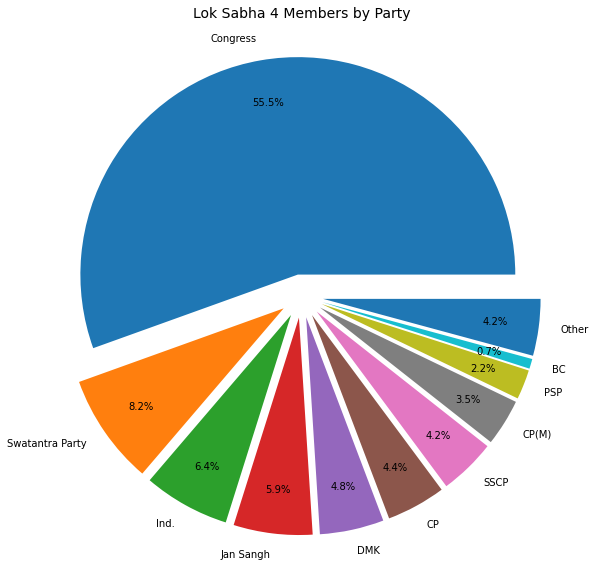

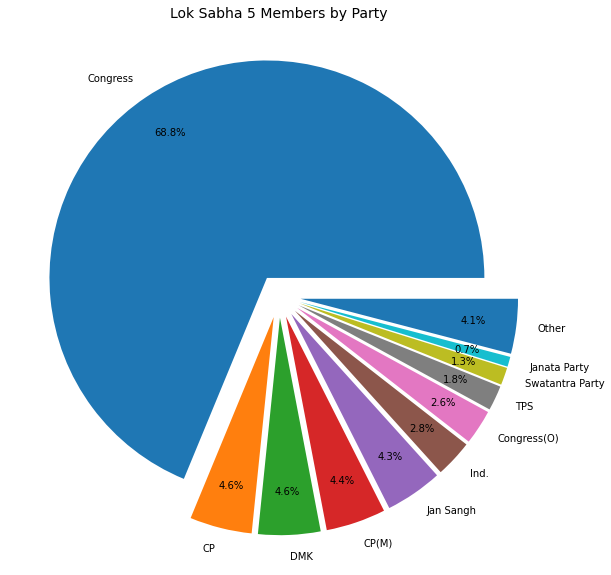

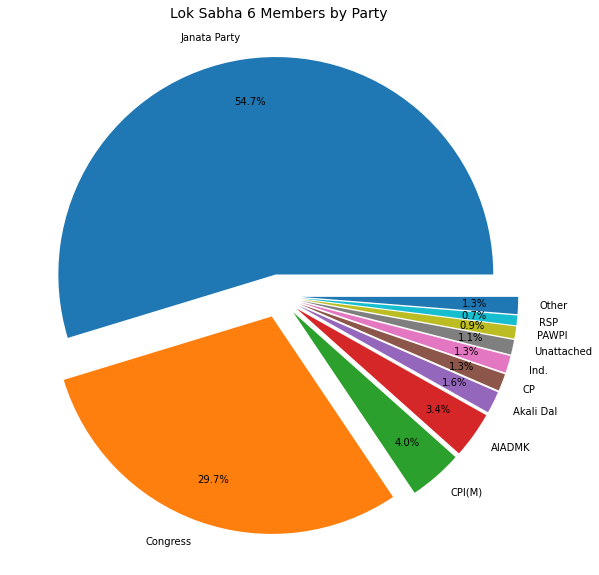

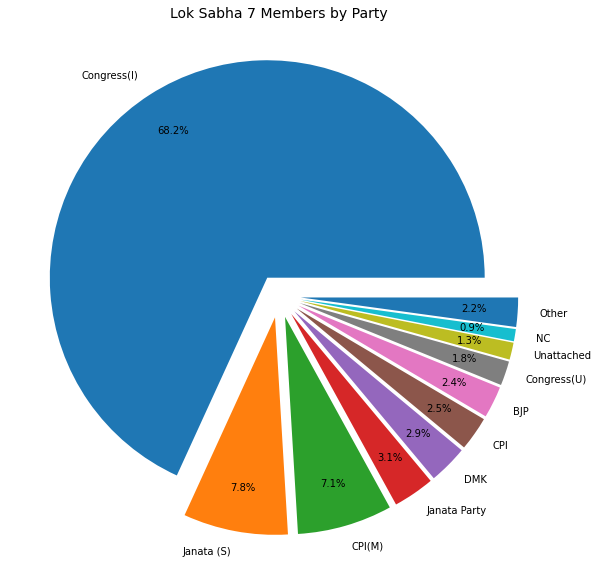

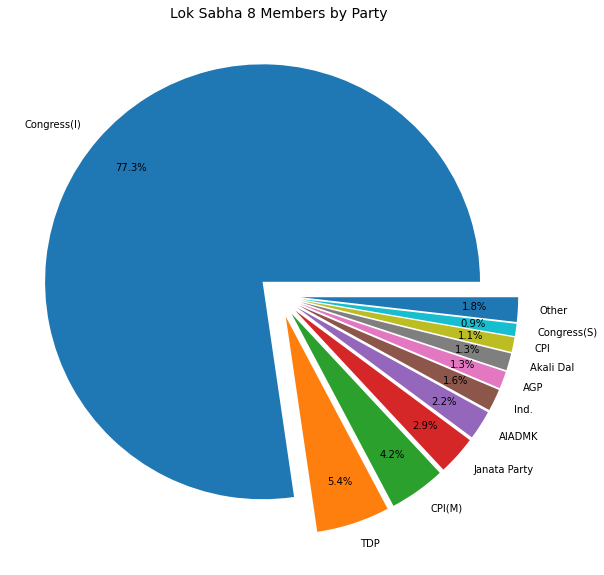

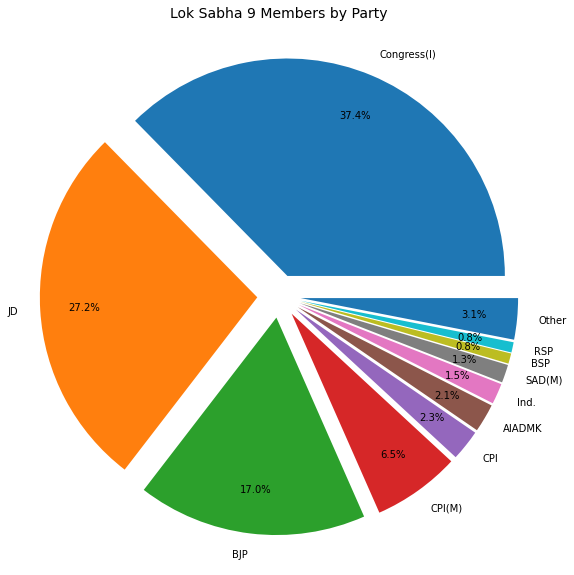

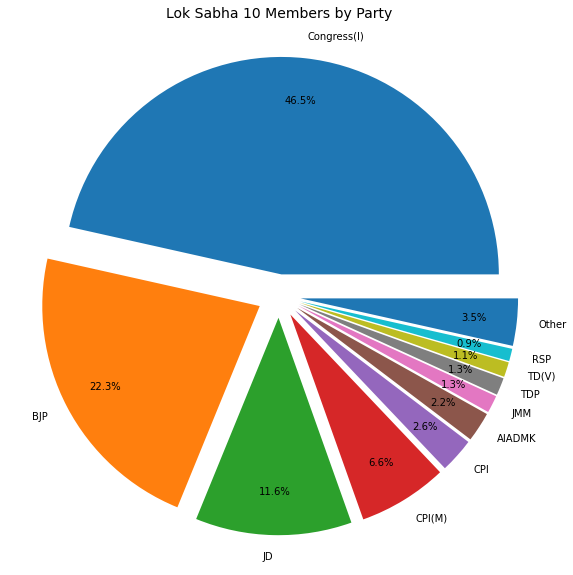

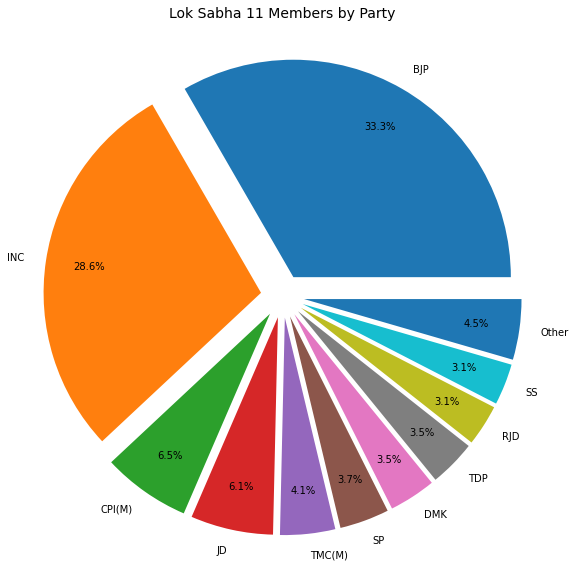

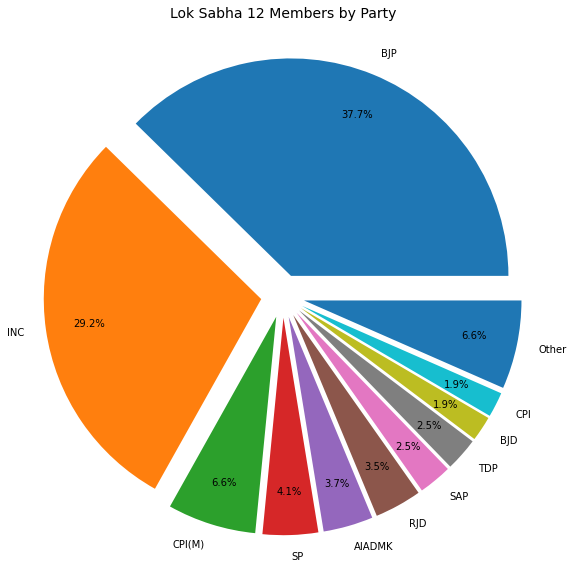

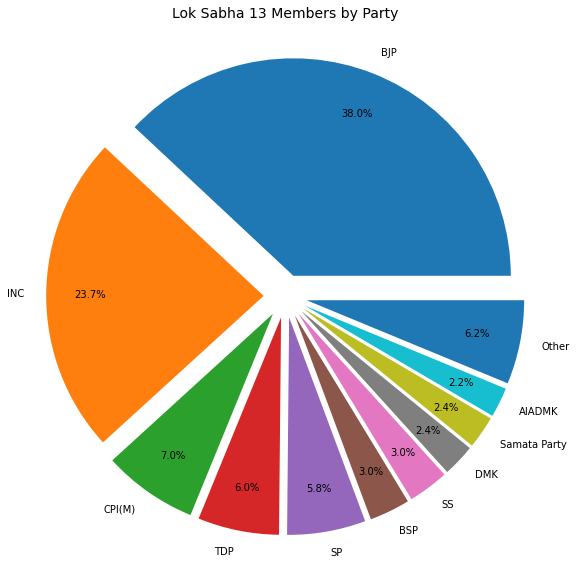

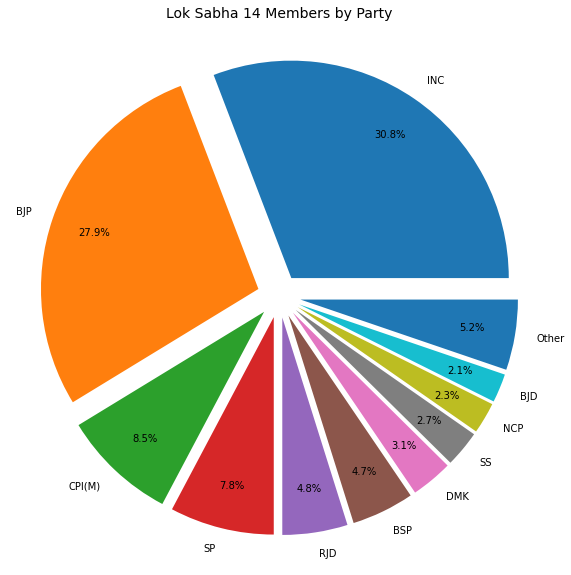

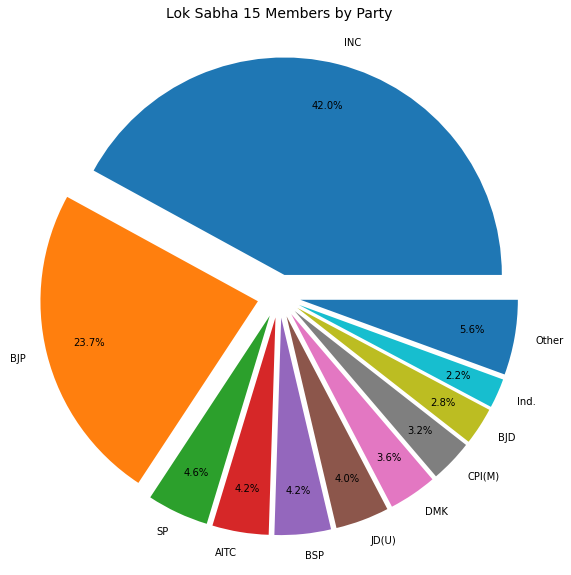

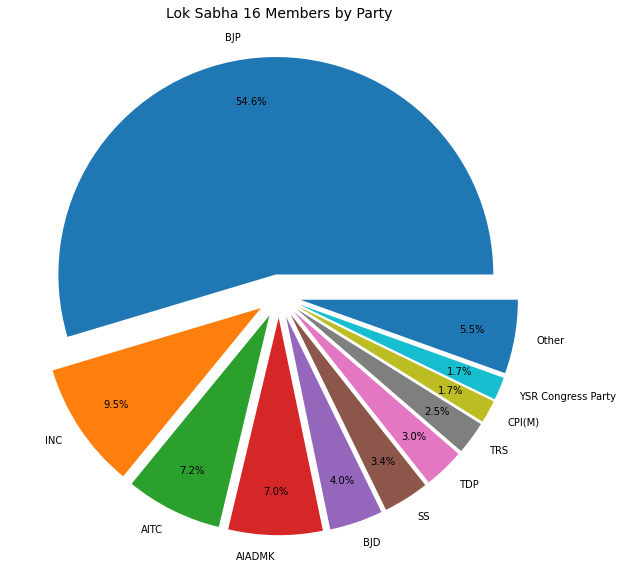

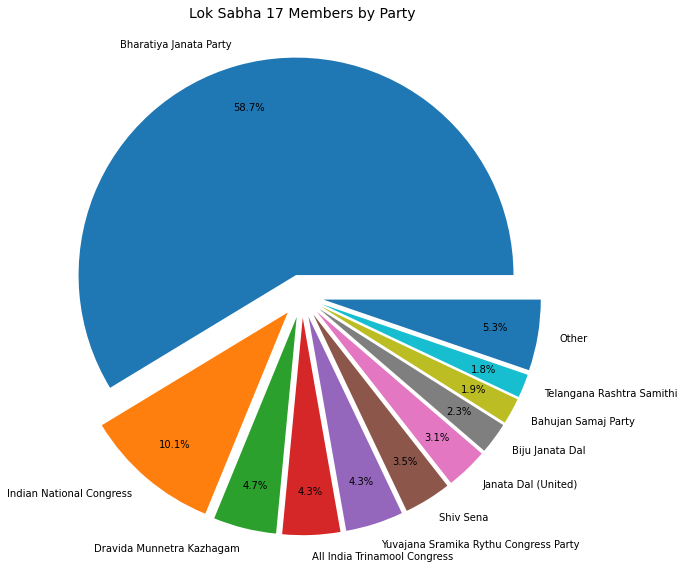

In [77]:
ls_breakdowns = {}
party_names = []

for i in range(len(lok_sabha_member_data_files)):
    curr_lok_sabha = pd.read_csv(lok_sabha_member_data_files[i]).drop(columns = ['Unnamed: 0'])
    curr_lok_sabha_party_data = curr_lok_sabha.groupby("Party Name")["Member"].count()
    largest_ls_data = curr_lok_sabha_party_data.nlargest(10)
    largest_ls_data['Other'] = curr_lok_sabha_party_data[~curr_lok_sabha_party_data.isin(largest_ls_data)].dropna().count()

    pie, ax = plt.subplots(figsize = [10, 10])
    labels = largest_ls_data.keys()
    plt.pie(x = largest_ls_data, autopct = "%.1f%%", explode = [0.1] * len(labels), labels = labels, pctdistance = 0.8)
    plt.title("Lok Sabha {lsno} Members by Party".format(lsno = i + 1), fontsize = 14)
    
    ls_breakdowns['ls {lsno}'.format(lsno = i + 1)] = largest_ls_data.to_dict()
    party_names.extend(list(set(largest_ls_data.keys())))

    plt.show()

In [80]:
party_names = list(set(party_names))
party_names

['CP(M)',
 'TDP',
 'Congress(O)',
 'AIADMK',
 'Swatantra Party',
 'Bharatiya Janata Party',
 'Shiv Sena',
 'Indian National Congress',
 'PDF',
 'Samata Party',
 'GP',
 'NM',
 'BJP',
 'Janata Party',
 'SP',
 'CPI',
 'Jan Sangh',
 'Akali Dal',
 'Biju Janata Dal',
 'Telangana Rashtra Samithi',
 'JD',
 'TD(V)',
 'Congress(I)',
 'All India Trinamool Congress',
 'SAP',
 'Other',
 'NCP',
 'JD(U)',
 'RSP',
 'NC',
 'SCF',
 'CP',
 'Yuvajana Sramika Rythu Congress Party',
 'CPI(M)',
 'SSCP',
 'RJD',
 'SAD(M)',
 'Congress(S)',
 'JMM',
 'AGP',
 'TMC(M)',
 'Congress',
 'BSP',
 'AITC',
 'INC',
 'KMPP',
 'Congress(U)',
 'TRS',
 'PSP',
 'Socialist',
 'BJD',
 'YSR Congress Party',
 'RPI',
 'BC',
 'DMK',
 'Ind.',
 'TPS',
 'Dravida Munnetra Kazhagam',
 'Bahujan Samaj Party',
 'Janata (S)',
 'Jharkhand',
 'Akali',
 'SS',
 'PAWPI',
 'Unattached',
 'Janata Dal (United)']

In [82]:
syns = {
    'INC': 'Indian National Congress',
    'BJP': 'Bharatiya Janata Party',
    'Congress': 'Indian National Congress',
    'Ind.': 'Independent',
    'CP(M)': 'Communist Party of India (Marxist)',
    'TDP': 'Telugu Desam Party',
    'Congress(O)': 'Indian National Congress (Organization)',
    'AIADMK': 'All India Anna Dravida Munnetra Kazhagam',
    'PDF': 'Peoples Democratic Front',
    'GP': 'Ganatantra Parishad',
    'NM': 'Anglo-Indian (Nominated)',
    'SP': 'Socialist Party',
    'CPI': 'Communist Party of India',
    'JD': 'Janata Dal',
    'TD(V)': 'Telugu Desam (V)',
    'Congress(I)': 'Indian National Congress',
    'SAP': 'Samata Party',
    'NCP': 'Nagaland Peoples Council',
    'JD(U)': 'Janata Dal (United)',
    'RSP': 'Revolutionary Socialist Party (India)',
    'NC': 'Jammu & Kashmir National Conference',
    'SCF': 'Scheduled Castes Federation',
    'CP': 'Communist Party',
    'CPI(M)': 'Communist Party of India (Marxist)',
    'SSCP': 'Samyukta Socialist Party',
    'RJD': 'Rashtriya Janata Dal',
    'SAD(M)': 'Shiromani Akali Dal',
    'Congress(S)': 'Indian National Congress (Socialist)',
    'JMM': 'Jharkhand Mukti Morcha',
    'AGP': 'Asom Gana Parishad',
    'TMC(M)': 'Tamil Maanila Congress',
    'BSP': 'Bahujan Samaj Party',
    'AITC': 'All India Trinamool Congress',
    'KMPP': 'Kisan Mazdoor Praja Party',
    'Congress(U)': 'Indian National Congress (Socialist)',
    'TRS': 'Telangana Rashtra Samithi',
    'PSP': 'Praja Socialist Party',
    'Socialist': 'Socialist Party',
    'BJD': 'Biju Janata Dal',
    'RPI': 'Republican Party of India',
    'BC': 'Bangla Congress',
    'DMK': 'Dravida Munnetra Kazhagam',
    'TPS': 'Telangana Praja Samithi',
    'Janata (S)': 'Janata Party (Secular)',
    'Jharkhand': 'Jharkhand Party',
    'Akali': 'Akali Dal',
    'SS': 'Shiv Sena',
    'PAWPI': 'Peasants and Workers Party of India',
}

In [83]:
cleaned_ls_breakdowns = {}
for k, v in ls_breakdowns.items():
    cleaned_ls_breakdowns[k] = {}
    for party_name, num in v.items():
        if party_name in syns:
            party_name = syns[party_name]
        cleaned_ls_breakdowns[k][party_name] = num

In [85]:
print(ls_breakdowns['ls 2'])

print(cleaned_ls_breakdowns['ls 2'])

{'Congress': 406, 'CP': 29, 'Ind.': 25, 'PSP': 17, 'Socialist': 7, 'GP': 6, 'Janata Party': 6, 'Jharkhand': 6, 'SCF': 6, 'Jan Sangh': 5, 'Other': 12}
{'Indian National Congress': 406, 'Communist Party': 29, 'Independent': 25, 'Praja Socialist Party': 17, 'Socialist Party': 7, 'Ganatantra Parishad': 6, 'Janata Party': 6, 'Jharkhand Party': 6, 'Scheduled Castes Federation': 6, 'Jan Sangh': 5, 'Other': 12}


In [102]:
cleaned_ls_breakdowns['ls 17']

{'Bharatiya Janata Party': 301,
 'Indian National Congress': 52,
 'Dravida Munnetra Kazhagam': 24,
 'All India Trinamool Congress': 22,
 'Yuvajana Sramika Rythu Congress Party': 22,
 'Shiv Sena': 18,
 'Janata Dal (United)': 16,
 'Biju Janata Dal': 12,
 'Bahujan Samaj Party': 10,
 'Telangana Rashtra Samithi': 9,
 'Other': 27}

In [103]:
unique_party_names = []
for k, v in cleaned_ls_breakdowns.items():
    for p, _ in v.items():
        unique_party_names.append(p)
print(list(set(unique_party_names)))

['Bharatiya Janata Party', 'Shiv Sena', 'Swatantra Party', 'Indian National Congress', 'Revolutionary Socialist Party (India)', 'Samata Party', 'Jharkhand Party', 'Janata Party', 'Jammu & Kashmir National Conference', 'Jan Sangh', 'Akali Dal', 'Biju Janata Dal', 'Telugu Desam Party', 'Bangla Congress', 'Shiromani Akali Dal', 'Scheduled Castes Federation', 'Asom Gana Parishad', 'Communist Party', 'Telangana Praja Samithi', 'Telangana Rashtra Samithi', 'Nagaland Peoples Council', 'Republican Party of India', 'All India Trinamool Congress', 'Tamil Maanila Congress', 'Other', 'Indian National Congress (Socialist)', 'Communist Party of India (Marxist)', 'Indian National Congress (Organization)', 'Janata Party (Secular)', 'Samyukta Socialist Party', 'Yuvajana Sramika Rythu Congress Party', 'Communist Party of India', 'Socialist Party', 'Independent', 'Peoples Democratic Front', 'Janata Dal', 'Praja Socialist Party', 'Kisan Mazdoor Praja Party', 'YSR Congress Party', 'Dravida Munnetra Kazhaga

In [104]:
len(list(set(unique_party_names)))

50

In [108]:
party_counts_overall = {}
for k, v in cleaned_ls_breakdowns.items():
    for p, count in v.items():
        if p in party_counts_overall:
            party_counts_overall[p] += count
        else:
            party_counts_overall[p] = count

print(list(dict(sorted(party_counts_overall.items(), key = lambda x: x[1], reverse = True)[:11]).keys()))

['Indian National Congress', 'Bharatiya Janata Party', 'Communist Party of India (Marxist)', 'Other', 'Janata Party', 'Janata Dal', 'Independent', 'Dravida Munnetra Kazhagam', 'Socialist Party', 'Communist Party', 'All India Anna Dravida Munnetra Kazhagam']


## Determining Celebrity Status

In [116]:
all_lok_sabha = pd.DataFrame({
    'Member': [],
    'Party Name': [],
    'Constituency': [],
    'LS Num': [],
})

for i in range(len(lok_sabha_member_data_files)):
    curr_lok_sabha = pd.read_csv(lok_sabha_member_data_files[i]).drop(columns = ['Unnamed: 0'])
    curr_lok_sabha['LS Num'] = i + 1
    all_lok_sabha = all_lok_sabha.append(curr_lok_sabha)

all_lok_sabha['LS Num'] = all_lok_sabha['LS Num'].astype(int)
all_lok_sabha.tail()

,Member,Party Name,Constituency,LS Num
535,"Yadav, Dr. Krishnapal Singh",Bharatiya Janata Party,Guna (Madhya Pradesh),17
536,"Yadav, Shri Mulayam Singh",Samajwadi Party,Mainpuri (Uttar Pradesh),17
537,"Yadav, Shri Ram Kripal",Bharatiya Janata Party,Pataliputra (Bihar),17
538,"Yadav, Shri Shyam Singh",Bahujan Samaj Party,Jaunpur (Uttar Pradesh),17
539,"Yepthomi, Shri Tokheho",Nationalist Democratic Progressive Party,Nagaland (Nagaland),17


In [138]:
messy_ex = 'Yadav, Dr. Krishnapal Singh'
messy_ex = messy_ex.split(',')
messy_ex = ' '.join([messy_ex[1], messy_ex[0]]).replace('Mr.', '').replace('Mrs.', '').replace('Ms.', '').replace('Dr.', '').strip()
messy_ex

'Krishnapal Singh Yadav'

In [ ]:
# clean names -- swap last, first order; remove "Ms.", "Mrs.", "Dr.", "Mr." titles
all_lok_sabha['Clean Member'] = all_lok_Sabha['Member']

In [140]:
# 
# pywiki_ex = all_lok_sabha.iloc[len(all_lok_sabha) - 1].Member
pywiki_ex = 'Chakraborty, Mimi'
pywiki.search(pywiki_ex)

['Mimi Chakraborty',
 'Nusrat Jahan',
 'Bojhena Shey Bojhena',
 'Jamai 420',
 'Posto (film)',
 'SOS Kolkata',
 'Srabanti Chatterjee',
 'Saayoni Ghosh',
 'Chakraborty',
 'Golpo Holeo Shotti']